### Predicting Telecom Customer Churn
#### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Data
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')

In [3]:
# Merging the data sets
df = pd.merge(churn_data, customer_data, on = 'customerID', how = 'inner')
telecom_df = pd.merge(df, internet_data, on = 'customerID', how = 'inner')

In [4]:
# quick lok at the data
print(telecom_df.shape)
telecom_df.head()

(7043, 21)


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [5]:
# Data types
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

### Data Preparation

In [6]:
# Converting TotalCharges from string to numerical
telecom_df['TotalCharges'] = pd.to_numeric(telecom_df['TotalCharges'], errors = 'coerce')

# drop customerID
telecom_df.drop('customerID', axis = 1, inplace = True)

In [7]:
# Dummy variable creation
# Converting all categoricals to dummy variables

cat_df = telecom_df.select_dtypes(include='object')

# store the categorical variables
cat_vars = cat_df.columns

cat_df = pd.get_dummies(cat_df, drop_first=True)

In [8]:
cat_df.head()

,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,gender_Male,Partner_Yes,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Merge dummy variables with the original data and drop the original categorical variables
telecom_df = pd.concat([telecom_df, cat_df], axis = 1)
telecom_df.drop(cat_vars, axis = 1, inplace = True)

In [10]:
print(telecom_df.shape)
telecom_df.info()

(7043, 31)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
SeniorCitizen                            7043 non-null int64
PhoneService_Yes                         7043 non-null uint8
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaperlessBilling_Yes                     7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check               7043 non-null uint8
Churn_Yes                                7043 non-null uint8
gender_Male                              7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes          

In [11]:
# check for missing values
missing = telecom_df.isnull().mean()
missing

tenure                                   0.000000
MonthlyCharges                           0.000000
TotalCharges                             0.001562
SeniorCitizen                            0.000000
PhoneService_Yes                         0.000000
Contract_One year                        0.000000
Contract_Two year                        0.000000
PaperlessBilling_Yes                     0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaymentMethod_Electronic check           0.000000
PaymentMethod_Mailed check               0.000000
Churn_Yes                                0.000000
gender_Male                              0.000000
Partner_Yes                              0.000000
Dependents_Yes                           0.000000
MultipleLines_No phone service           0.000000
MultipleLines_Yes                        0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.000000
OnlineSecurity_No internet service       0.000000


We can see only TotalCharges has missing values and the amount of missing values is very less, so we can drop them.

In [12]:
telecom_df = telecom_df.dropna()
telecom_df.isnull().sum()

tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
SeniorCitizen                            0
PhoneService_Yes                         0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Churn_Yes                                0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProte

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

# separate predictors and target
X = telecom_df.drop('Churn_Yes', axis = 1)
y = telecom_df[['Churn_Yes']]
predictors = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 30)
(1407, 30)
(5625, 1)
(1407, 1)


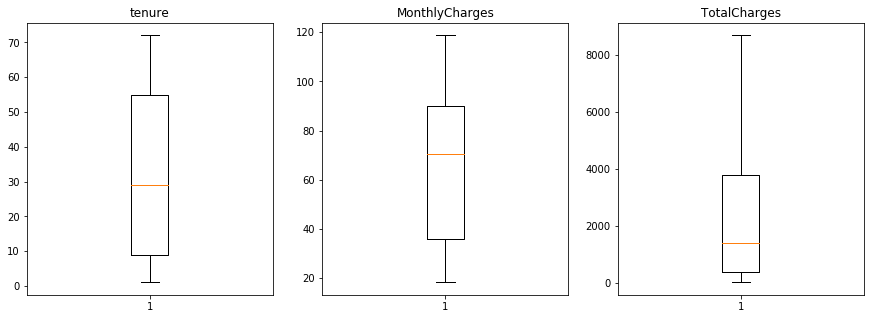

In [14]:
# check for outliers in the continuous numerical variables
#X_train[['tenure','MonthlyCharges','TotalCharges']].hist(figsize = (10,5))
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.boxplot(X_train['tenure'])
plt.title('tenure')

plt.subplot(1,3,2)
plt.boxplot(X_train['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.subplot(1,3,3)
plt.boxplot(X_train['TotalCharges'])
plt.title('TotalCharges')

plt.show()

From the boxplots, we can see that the variables do not have any outliers.

#### Standardisation

In [15]:
# Apply min-max standardisation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# converting the transformed data back to data frames
X_train = pd.DataFrame(X_train, columns=predictors)
X_test = pd.DataFrame(X_test, columns = predictors)

In [17]:
y_train.reset_index(inplace = True)
y_train.drop('index', axis = 1,inplace = True)

In [18]:
y_train.head()

,Churn_Yes
0,0
1,0
2,0
3,0
4,1


### Model Training

In [19]:
import statsmodels.api as sm

In [20]:
# first model- Logistic Regression

lg_first = sm.GLM( y_train, (sm.add_constant(X_train)),family=sm.families.Binomial())
lg_first.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 5625
Model:                            GLM   Df Residuals:                     5601
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2336.9
Date:                Tue, 17 Sep 2019   Deviance:                       4673.8
Time:                        22:11:25   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3811      0.411      0.928      0.353      -0.424       1.186
tenure                                   -4.3170      0.499     -8.659      0.000      -5.294      -3.340
MonthlyCharges                           -5.1801      3.551     -1.459      0.145     -12.140       1.780
TotalCharges                              2.7237      0.687      3.964      0.000       1.377       4.070
SeniorCitizen                             0.2366      0.094      2.522      0.012       0.053       0.420
PhoneService_Yes                          0.3809      0.558      0.682      0.495      -0.713       1.475
Contract_One year                        -0.6457      0.119     -5.432      0.000      -0.879      -0.413
Contract_Two year                        -1.4395      0.197     -7.303      0.000      -1.826      -1.053
PaperlessBilling_Yes                      0.3031      0.083      3.652      0.000       0.140       0.466
PaymentMethod_Credit card (automatic)     0.0618      0.127      0.486      0.627      -0.187       0.311
PaymentMethod_Electronic check            0.3464      0.107      3.247      0.001       0.137       0.556
PaymentMethod_Mailed check               -0.0721      0.129     -0.557      0.577      -0.326       0.182
gender_Male                              -0.0187      0.072     -0.258      0.796      -0.161       0.123
Partner_Yes                              -0.0230      0.087     -0.265      0.791      -0.193       0.147
Dependents_Yes                           -0.1077      0.100     -1.076      0.282      -0.304       0.088
MultipleLines_No phone service            0.0003      0.185      0.001      0.999      -0.362       0.363
MultipleLines_Yes                         0.5151      0.197      2.613      0.009       0.129       0.901
InternetService_Fiber optic               2.0445      0.888      2.302      0.021       0.304       3.785
InternetService_No                       -0.2903      0.128     -2.262      0.024      -0.542      -0.039
OnlineSecurity_No internet service       -0.2903      0.128     -2.262      0.024      -0.542      -0.039
OnlineSecurity_Yes                       -0.0769      0.198     -0.389      0.698      -0.465       0.311
OnlineBackup_No internet service         -0.2903      0.128     -2.262      0.024      -0.542      -0.039
OnlineBackup_Yes                          0.1069      0.195      0.548      0.583      -0.275       0.489
DeviceProtection_No internet service     -0.2903      0.128     -2.262      0.024      -0.542      -0.039
DeviceProtection_Yes                      0.2152      0.197      1.095      0.274      -0.170       0.601
TechSupport_No internet service          -0.2903      0.128     -2.262      0.024      -0.542      -0.039
TechSuppo

From the summary, we can see that there are some variables that have P-values above the 0.05 significance levels. So, we may try to peform variable selection and again do the modeling.

#### Variable selection with Recursive Feature Elimination (RFE)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

LR = LogisticRegression()
rfe = RFE(LR,n_features_to_select=18)
rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True False  True False False
 False False False  True  True  True  True  True False False False False
 False  True False  True  True  True]
[ 1  1  1  1  1  1  1  1  9  1 10 12 11  5  7  1  1  1  1  1  4  8  6 13
  2  1  3  1  1  1]


In [22]:
# columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'PhoneService_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [23]:
# Again train the logistic regression with the selected features
lg_second = sm.GLM(y_train, (sm.add_constant(X_train[col])), family=sm.families.Binomial())
lg_second.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 5625
Model:                            GLM   Df Residuals:                     5608
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2339.1
Date:                Tue, 17 Sep 2019   Deviance:                       4678.2
Time:                        22:11:26   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.1274      0.190      0.669      0.503      -0.246       0.501
tenure                                 -4.2950      0.489     -8.789      0.000      -5.253      -3.337
MonthlyCharges                         -2.2996      1.180     -1.949      0.051      -4.612       0.012
TotalCharges                            2.6996      0.682      3.959      0.000       1.363       4.036
SeniorCitizen                           0.2553      0.092      2.769      0.006       0.075       0.436
PhoneService_Yes                       -0.1980      0.270     -0.734      0.463      -0.726       0.330
Contract_One year                      -0.6479      0.118     -5.473      0.000      -0.880      -0.416
Contract_Two year                      -1.4401      0.196     -7.337      0.000      -1.825      -1.055
PaperlessBilling_Yes                    0.3125      0.083      3.776      0.000       0.150       0.475
PaymentMethod_Electronic check          0.3505      0.077      4.524      0.000       0.199       0.502
MultipleLines_Yes                       0.3746      0.106      3.528      0.000       0.167       0.583
InternetService_Fiber optic             1.3441      0.307      4.385      0.000       0.743       1.945
InternetService_No                     -0.4461      0.117     -3.825      0.000      -0.675      -0.218
OnlineSecurity_No internet service     -0.4461      0.117     -3.825      0.000      -0.675      -0.218
OnlineSecurity_Yes                     -0.2205      0.111     -1.987      0.047      -0.438      -0.003
TechSupport_Yes                        -0.2143      0.114     -1.887      0.059      -0.437       0.008
StreamingTV_Yes                         0.4696      0.150      3.122      0.002       0.175       0.764
StreamingMovies_No internet service    -0.4461      0.117     -3.825      0.000      -0.675      -0.218
StreamingMovies_Yes                     0.5094      0.149      3.410      0.001       0.217       0.802
=======================================================================================================
"""

We can now see that almost all the variables have p-values less than 0.05. 

In [24]:
# Fitting the final model
LR_final = LogisticRegression()
LR_final.fit(X_train[col],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
# predictions in test data
pred_test = LR_final.predict_proba(X_test[col])

In [26]:
pred_test

array([[0.99652835, 0.00347165],
       [0.33353666, 0.66646334],
       [0.92546239, 0.07453761],
       ...,
       [0.92284442, 0.07715558],
       [0.9345278 , 0.0654722 ],
       [0.83217364, 0.16782636]])

In [27]:
# AUC score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# auc score with cross validation
auc_cv_score = cross_val_score(LR_final,X_train[col],y_train,scoring = 'roc_auc', cv = 10)

#auc_score = metrics.roc_auc_score(y_test,pred_test[:,1])
#auc_score
print(auc_cv_score)
print()
print("The average auc score is {}".format(np.mean(auc_cv_score)))

[0.8423825  0.8322082  0.83719379 0.86152104 0.84239482 0.85255663
 0.86127832 0.822411   0.83555016 0.85486246]

The average auc score is 0.8442358925457158


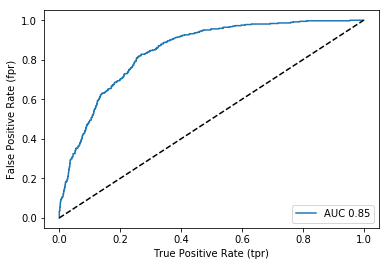

In [28]:
# AUC plot
auc_score = metrics.roc_auc_score(y_test,pred_test[:,1])
fpr,tpr, thresholds = metrics.roc_curve(y_test,pred_test[:,1])

plt.plot(fpr,tpr, label = "AUC %0.2f" % auc_score)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('True Positive Rate (tpr)')
plt.ylabel('False Positive Rate (fpr)')
plt.legend(loc = 'lower right')

In [29]:
# Classification report
pred_class = LR_final.predict(X_test[col])
print(metrics.classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.62      0.53      0.57       366

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407



[[923 118]
 [171 195]]


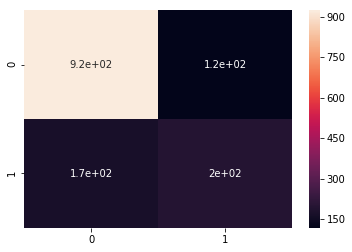

In [30]:
# confusion matrix
import seaborn as sns
cm = metrics.confusion_matrix(y_test, pred_class)
print(cm)
sns.heatmap(cm, annot = True,)

In [31]:
# XgBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train[col], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [32]:
pred_xgb = xgb_model.predict_proba(X_test[col])

In [33]:
# auc
metrics.roc_auc_score(y_test, pred_xgb[:,1])

0.8517188705689674